In [1]:
import matplotlib.pyplot as plt
import numpy as np
from helpers_plot import initPlot, finalizePlot, prepareMap3Plot

# Plotting of measured  $\langle M_\mathrm{ap}^3\rangle$ 
In this notebook we plot all the measured aperture statistics and compare to a theoretical model

Author: Laila Linke

The Map3 measurement and modelling code is developed together with Sven Heydenreich, the Read-in of the simulations is based on the example notebook by Joachim Harnois-Déraps and Jia Liu

The model is based on the `BiHalofit` bispectrum model ([Takahashi+ 2021](https://ui.adsabs.harvard.edu/abs/2020ApJ...895..113T/abstract)) and calculated with a seperate (C/CUDA based) Code, available here: [https://github.com/sheydenreich/threepoint](https://github.com/sheydenreich/threepoint)

In [2]:
initPlot(usetex=False)

We first plot all the Map3 measurements together with the model

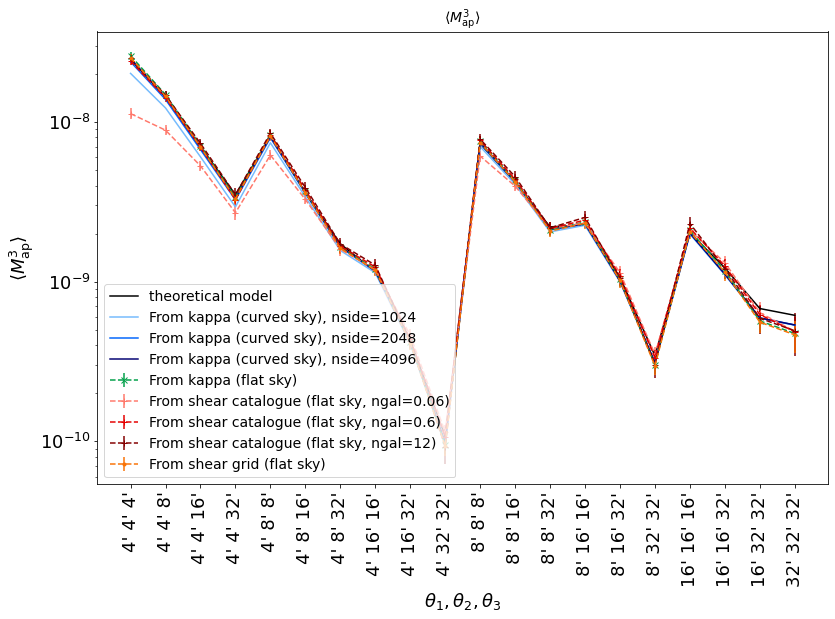

In [7]:
# Read in calculations
model=np.loadtxt("MapMapMap_model.dat")[:,3]
nside1=2**10
nside2=2**11
nside3=2**12
kappa_curved_nside1=np.loadtxt(f"MapMapMap_fromCurved_Kappa_nside_{nside1}.dat")
kappa_curved_nside2=np.loadtxt(f"MapMapMap_fromCurved_Kappa_nside_{nside2}.dat")
kappa_curved_nside3=np.loadtxt(f"MapMapMap_fromCurved_Kappa_nside_{nside3}.dat")


kappa=np.loadtxt("MapMapMap_fromFlat_Kappa.dat")
ngal1=0.06
ngal2=0.6
ngal3=12
shearcat1=np.loadtxt("MapMapMap_fromFlat_ShearCat_ngal_006.dat")
shearcat2=np.loadtxt("MapMapMap_fromFlat_ShearCat_ngal_06.dat")
shearcat3=np.loadtxt("MapMapMap_fromFlat_ShearCat_ngal_12.dat")


shear=np.loadtxt("MapMapMap_fromFlat_ShearMap.dat")
Npatches=len(kappa)

fig, ax=plt.subplots(figsize=(12,9))
prepareMap3Plot(ax)

ax.plot(model, label='theoretical model', color='k')
ax.plot(kappa_curved_nside1, label=f'From kappa (curved sky), nside={nside1}', ls='-', color="xkcd:sky blue")
ax.plot(kappa_curved_nside2, label=f'From kappa (curved sky), nside={nside2}', ls='-', color="xkcd:bright blue")
ax.plot(kappa_curved_nside3, label=f'From kappa (curved sky), nside={nside3}', ls='-', color="xkcd:deep blue")


ax.errorbar(np.arange(len(kappa[:,0])), np.mean(kappa, axis=1), yerr=np.std(kappa, axis=1)/np.sqrt(Npatches), ls='--', marker='x', label='From kappa (flat sky)', color='xkcd:emerald')
ax.errorbar(np.arange(len(shearcat1[:,0])), np.mean(shearcat1, axis=1), yerr=np.std(shearcat1, axis=1)/np.sqrt(Npatches), ls='--', marker='+', label=f'From shear catalogue (flat sky, ngal={ngal1})', color='xkcd:salmon')
ax.errorbar(np.arange(len(shearcat2[:,0])), np.mean(shearcat2, axis=1), yerr=np.std(shearcat2, axis=1)/np.sqrt(Npatches), ls='--', marker='+', label=f'From shear catalogue (flat sky, ngal={ngal2})', color='xkcd:red')
ax.errorbar(np.arange(len(shearcat3[:,0])), np.mean(shearcat3, axis=1), yerr=np.std(shearcat3, axis=1)/np.sqrt(Npatches), ls='--', marker='+', label=f'From shear catalogue (flat sky, ngal={ngal3})', color='xkcd:dark red')


ax.errorbar(np.arange(len(shear[:,0])), np.mean(shear, axis=1), yerr=np.std(shear, axis=1)/np.sqrt(Npatches), ls='--', marker='.', label='From shear grid (flat sky)', color='xkcd:orange')


finalizePlot(ax, title=r"$\langle M_\mathrm{ap}^3\rangle$", outputFn="MapMapMap_all.png")

Next we plot the fractional differences of the measurements to the model. Note that the grey area shows the approximate accuracy of the model (~10%) and that the point markers are slightly displaced along the x-axis for better visibility of the error bars

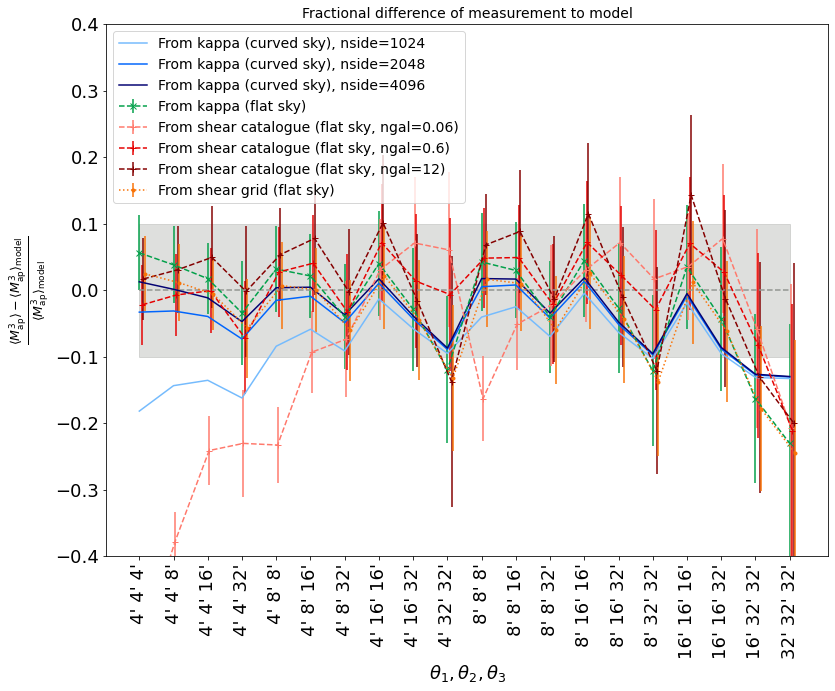

In [27]:
# Plot fractional errors to model
fig, ax=plt.subplots(figsize=(12,10))
prepareMap3Plot(ax)

ax.set_yscale('linear')
#ax.plot(model, label='theoretical model', color='k')
ax.plot((kappa_curved_nside1-model)/model, label=f'From kappa (curved sky), nside={nside1}', ls='-', color="xkcd:sky blue")
ax.plot((kappa_curved_nside2-model)/model, label=f'From kappa (curved sky), nside={nside2}', ls='-', color="xkcd:bright blue")
ax.plot((kappa_curved_nside3-model)/model, label=f'From kappa (curved sky), nside={nside3}', ls='-', color="xkcd:deep blue")


ax.errorbar(range(len(kappa[:,0])), (np.mean(kappa, axis=1)-model)/model, yerr=np.std(kappa, axis=1)/np.sqrt(Npatches)/model, ls='--', marker='x', label='From kappa (flat sky)', color="xkcd:emerald")
ax.errorbar(np.arange(len(shearcat1[:,0]))+0.04, (np.mean(shearcat1, axis=1)-model)/model, yerr=np.std(shearcat1, axis=1)/np.sqrt(Npatches)/model, ls='--', marker='+',  label=f'From shear catalogue (flat sky, ngal={ngal1})', color='xkcd:salmon')
ax.errorbar(np.arange(len(shearcat2[:,0]))+0.08, (np.mean(shearcat2, axis=1)-model)/model, yerr=np.std(shearcat2, axis=1)/np.sqrt(Npatches)/model, ls='--', marker='+',  label=f'From shear catalogue (flat sky, ngal={ngal2})', color='xkcd:red')
ax.errorbar(np.arange(len(shearcat3[:,0]))+0.12, (np.mean(shearcat3, axis=1)-model)/model, yerr=np.std(shearcat3, axis=1)/np.sqrt(Npatches)/model, ls='--', marker='+',  label=f'From shear catalogue (flat sky, ngal={ngal3})', color='xkcd:dark red')

ax.errorbar(np.arange(len(shear[:,0]))+0.16, (np.mean(shear, axis=1)-model)/model, yerr=np.std(shear, axis=1)/np.sqrt(Npatches)/model, ls=':', marker='.', label='From shear grid (flat sky)', color="xkcd:orange")

ax.set_ylim(-0.4, 0.4)
ax.set_ylabel(r"$\frac{\langle M_\mathrm{ap}^3\rangle-\langle M_\mathrm{ap}^3\rangle_\mathrm{model}}{\langle M_\mathrm{ap}^3\rangle_\mathrm{model}}$")
ax.hlines([0],0, len(kappa[:,0])-1, color='xkcd:grey', ls='--')
ax.fill_between(range(len(kappa[:,0])), -0.1, 0.1, color='xkcd:grey', alpha=0.3)
finalizePlot(ax, title=r"Fractional difference of measurement to model", outputFn="FracErr_MapMapMap_all.png")

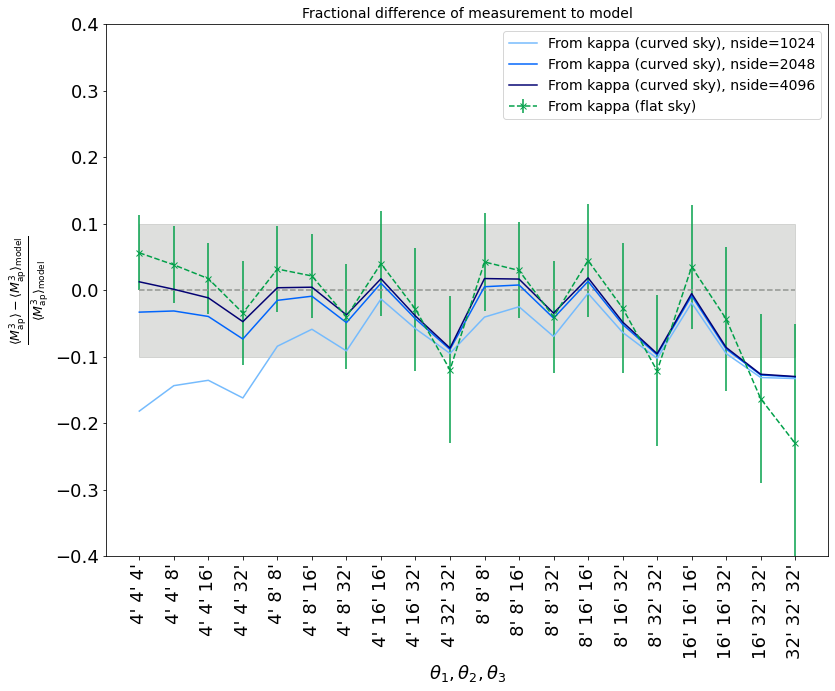

In [20]:
# Plot fractional errors to model (only kappa)
fig, ax=plt.subplots(figsize=(12,10))
prepareMap3Plot(ax)

ax.set_yscale('linear')
#ax.plot(model, label='theoretical model', color='k')
ax.plot((kappa_curved_nside1-model)/model, label=f'From kappa (curved sky), nside={nside1}', ls='-', color="xkcd:sky blue")
ax.plot((kappa_curved_nside2-model)/model, label=f'From kappa (curved sky), nside={nside2}', ls='-', color="xkcd:bright blue")
ax.plot((kappa_curved_nside3-model)/model, label=f'From kappa (curved sky), nside={nside3}', ls='-', color="xkcd:deep blue")


ax.errorbar(range(len(kappa[:,0])), (np.mean(kappa, axis=1)-model)/model, yerr=np.std(kappa, axis=1)/np.sqrt(Npatches)/model, ls='--', marker='x', label='From kappa (flat sky)', color="xkcd:emerald")

ax.set_ylim(-0.4, 0.4)
ax.set_ylabel(r"$\frac{\langle M_\mathrm{ap}^3\rangle-\langle M_\mathrm{ap}^3\rangle_\mathrm{model}}{\langle M_\mathrm{ap}^3\rangle_\mathrm{model}}$")
ax.hlines([0],0, len(kappa[:,0])-1, color='xkcd:grey', ls='--')
ax.fill_between(range(len(kappa[:,0])), -0.1, 0.1, color='xkcd:grey', alpha=0.3)
finalizePlot(ax, title=r"Fractional difference of measurement to model", outputFn="FracErr_MapMapMap_kappa.png")

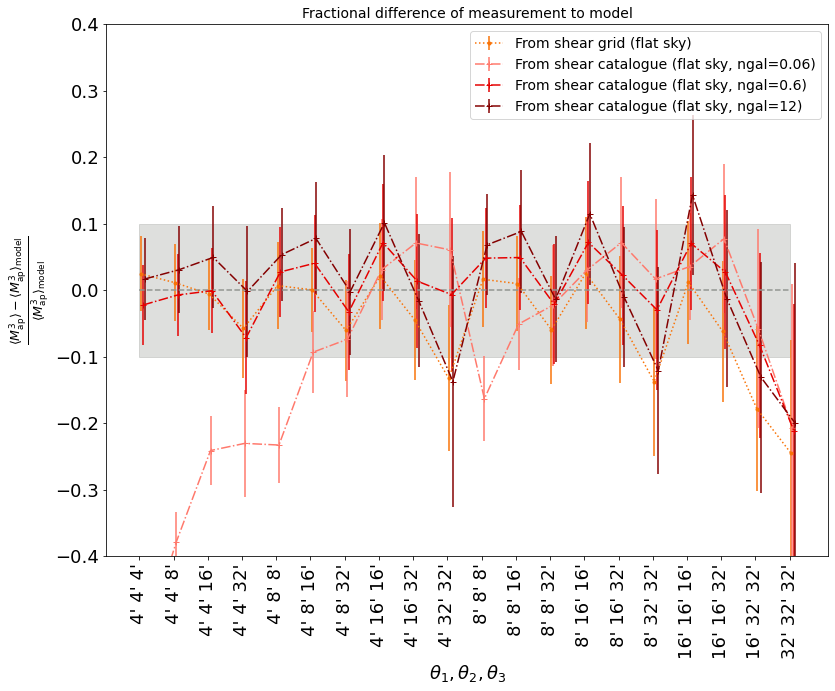

In [30]:
# Plot fractional errors to model (only shear)
fig, ax=plt.subplots(figsize=(12,10))
prepareMap3Plot(ax)

ax.set_yscale('linear')
#ax.plot(model, label='theoretical model', color='k')
ax.errorbar(np.arange(len(shear[:,0]))+0.04, (np.mean(shear, axis=1)-model)/model, yerr=np.std(shear, axis=1)/np.sqrt(Npatches)/model, ls=':', marker='.', label='From shear grid (flat sky)', color="xkcd:orange")

ax.errorbar(np.arange(len(shearcat1[:,0]))+0.08, (np.mean(shearcat1, axis=1)-model)/model, yerr=np.std(shearcat1, axis=1)/np.sqrt(Npatches)/model, ls='-.', marker='+',  label=f'From shear catalogue (flat sky, ngal={ngal1})', color='xkcd:salmon')
ax.errorbar(np.arange(len(shearcat2[:,0]))+0.12, (np.mean(shearcat2, axis=1)-model)/model, yerr=np.std(shearcat2, axis=1)/np.sqrt(Npatches)/model, ls='-.', marker='+',  label=f'From shear catalogue (flat sky, ngal={ngal2})', color='xkcd:red')
ax.errorbar(np.arange(len(shearcat3[:,0]))+0.16, (np.mean(shearcat3, axis=1)-model)/model, yerr=np.std(shearcat3, axis=1)/np.sqrt(Npatches)/model, ls='-.', marker='+',  label=f'From shear catalogue (flat sky, ngal={ngal3})', color='xkcd:dark red')


ax.set_ylim(-0.4, 0.4)
ax.set_ylabel(r"$\frac{\langle M_\mathrm{ap}^3\rangle-\langle M_\mathrm{ap}^3\rangle_\mathrm{model}}{\langle M_\mathrm{ap}^3\rangle_\mathrm{model}}$")
ax.hlines([0],0, len(kappa[:,0])-1, color='xkcd:grey', ls='--')
ax.fill_between(range(len(kappa[:,0])), -0.1, 0.1, color='xkcd:grey', alpha=0.3)
finalizePlot(ax, title=r"Fractional difference of measurement to model", outputFn="FracErr_MapMapMap_shear.png")